In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('Data_Regression/boston_house_prices.csv')

In [3]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
colonnes = ['CRIM','NOX','RM','AGE','LSTAT']
x = np.array(data[colonnes])
y = np.array(data.MEDV)
x.shape

(506, 5)

In [5]:
y = y.reshape(y.shape[0],1)
print(x.shape)
print(y.shape)

(506, 5)
(506, 1)


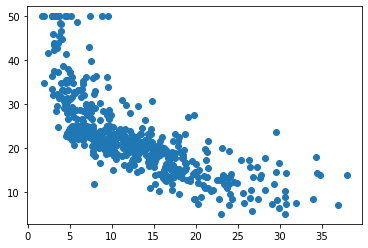

In [6]:
plt.scatter(x[:,4],y)

In [7]:
X = np.hstack((x,np.ones((x.shape[0],1))))

In [8]:
X.shape

(506, 6)

In [9]:
theta = np.random.randn(6,1)
theta.shape

(6, 1)

In [10]:
def model(X, theta):
    return X.dot(theta)

In [11]:
def fonction_cout(X, theta, y):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2) 

fonction_cout(X, theta, y)

308.485806962169

In [12]:
def gradient(X, theta, y):
    m = len(y)
    return 1/m * X.T.dot(model(X,theta)-y)

In [13]:
gradient(X, theta, y)

array([[ -100.50090977],
       [  -10.61280814],
       [ -129.11583305],
       [-1321.42355049],
       [ -178.5695394 ],
       [  -19.50400537]])

In [14]:
def descente_gradient(X, theta, y, alpha, n_iterations):
    cost = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - alpha*gradient(X, theta, y)
        cost[i] = fonction_cout(X, theta, y)
    return theta, cost

In [15]:
nouveau_theta = descente_gradient(X, theta, y, 0.0001, 2000)[0]

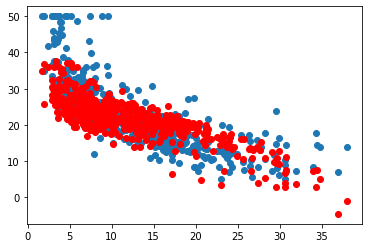

In [16]:
plt.scatter(x[:,4], y)
plt.scatter(x[:,4], model(X, nouveau_theta), c='r')

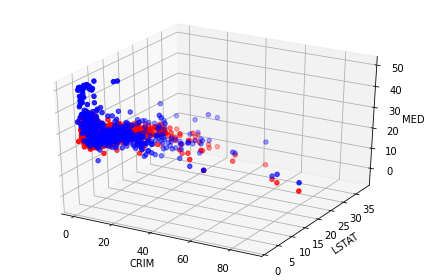

In [17]:
fig = plt.figure()
ax = fig.gca(projection="3d")

ax.scatter(x[:,0], x[:,4], y, c='b', cmap='hsv')
ax.scatter(x[:,0], x[:,4], model(X, nouveau_theta), c='r')
ax.set_xlabel('CRIM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV')
plt.tight_layout()

In [18]:
def coef_determination(X, theta, y):
    u = ((y - model(X, nouveau_theta))**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [19]:
coef_determination(X, nouveau_theta, y)

0.535258150541051

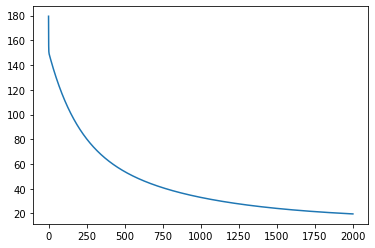

In [20]:
cost_history = np.array(descente_gradient(X, theta, y, 0.0001, 2000)[1])
plt.plot(range(len(cost_history)), cost_history)

## Avec Scikit Learn :

In [21]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [22]:
colonnes = ['CRIM','NOX','RM','AGE','LSTAT']
X = np.array(data[colonnes])
Y = np.array(data.MEDV)

Y = Y.reshape(Y.shape[0], 1)

print(X.shape)
print(Y.shape)

(506, 5)
(506, 1)


In [23]:
#Pour verifier s'il existe un NaN dans le DataFrame
data.isnull().any().any()

False

In [24]:
scaler = StandardScaler()

X = scaler.fit_transform(X)
Y = scaler.fit_transform(Y)

model = LinearRegression()
model.fit(X, Y)

prediction = model.predict(X)

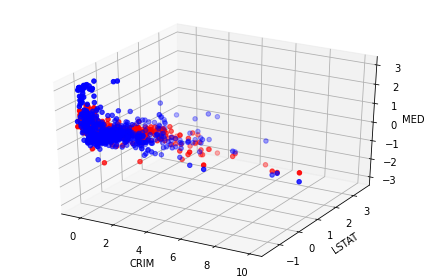

In [25]:
fig = plt.figure()
ax = fig.gca(projection="3d")

ax.scatter(X[:,0], X[:,4], Y, c='b', cmap='hsv')
ax.scatter(X[:,0], X[:,4], prediction, c='r')
ax.set_xlabel('CRIM')
ax.set_ylabel('LSTAT')
ax.set_zlabel('MEDV')
plt.tight_layout()

In [26]:
model.score(X,Y)

0.6472560328966726

In [27]:
erreur_quad = mean_squared_error(Y,prediction)
print(erreur_quad)

0.3527439671033274
